<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_cluster_data_multi_delta_(1_6)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_1.6'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_1.6_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,79.672151,91.361093,-50.389129,130.644115,174.321743,-43.677628
1,0.0,1.0,73.105653,71.852852,-10.257099,144.701406,151.258004,-6.556598
2,0.0,2.0,34.381339,50.578202,8.042747,103.002288,95.833761,7.168527
3,0.0,3.0,56.634531,79.811183,-44.971568,101.474146,142.300205,-40.826059
4,0.0,4.0,34.598113,83.564887,3.690500,131.853500,124.391201,7.462299
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,61.223821,33.282863,-8.841809,95.664875,102.434664,-6.769789
59996,999.0,56.0,93.997315,66.674007,-7.564325,163.106996,173.236184,-10.129188
59997,999.0,57.0,76.301093,71.882379,-47.486792,110.696680,160.350230,-49.653550
59998,999.0,58.0,92.624849,98.592832,27.159063,228.376744,206.607232,21.769512


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2          e           Y       y_hat  \
rep   index                                                            
0.0   0.0    79.672151  91.361093 -50.389129  130.644115  174.321743   
      1.0    73.105653  71.852852 -10.257099  144.701406  151.258004   
      2.0    34.381339  50.578202   8.042747  103.002288   95.833761   
      3.0    56.634531  79.811183 -44.971568  101.474146  142.300205   
      4.0    34.598113  83.564887   3.690500  131.853500  124.391201   
...                ...        ...        ...         ...         ...   
999.0 55.0   61.223821  33.282863  -8.841809   95.664875  102.434664   
      56.0   93.997315  66.674007  -7.564325  163.106996  173.236184   
      57.0   76.301093  71.882379 -47.486792  110.696680  160.350230   
      58.0   92.624849  98.592832  27.159063  228.376744  206.607232   
      59.0   27.545882  70.976362 -25.602628   82.919616  108.209857   

                 e_hat  
rep   index             
0.0   0.0   -43.677628  
      1.0    -6.556598  
      2.0     7.168527  
      3.0   -40.826059  
      4.0     7.462299  
...                ...  
999.0 55.0   -6.769789  
      56.0  -10.129188  
      57.0  -49.653550  
      58.0   21.769512  
      59.0  -25.290242  

[60000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2          e           Y       y_hat  \
rep   index                                                            
0.0   0.0    79.672151  91.361093 -50.389129  130.644115  174.321743   
      1.0    73.105653  71.852852 -10.257099  144.701406  151.258004   
      2.0    34.381339  50.578202   8.042747  103.002288   95.833761   
      3.0    56.634531  79.811183 -44.971568  101.474146  142.300205   
      4.0    34.598113  83.564887   3.690500  131.853500  124.391201   
...                ...        ...        ...         ...         ...   
999.0 55.0   61.223821  33.282863  -8.841809   95.664875  102.434664   
      56.0   93.997315  66.674007  -7.564325  163.106996  173.236184   
      57.0   76.301093  71.882379 -47.486792  110.696680  160.350230   
      58.0   92.624849  98.592832  27.159063  228.376744  206.607232   
      59.0   27.545882  70.976362 -25.602628   82.919616  108.209857   

                 e_hat  
rep   index             
0.0   0.0   -43.677628  
      1.0    -6.556598  
      2.0     7.168527  
      3.0   -40.826059  
      4.0     7.462299  
...                ...  
999.0 55.0   -6.769789  
      56.0  -10.129188  
      57.0  -49.653550  
      58.0   21.769512  
      59.0  -25.290242  

[60000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,79.672151,91.361093,-50.389129,130.644115,174.321743,-43.677628
1,0.0,1.0,73.105653,71.852852,-10.257099,144.701406,151.258004,-6.556598
2,0.0,2.0,34.381339,50.578202,8.042747,103.002288,95.833761,7.168527
3,0.0,3.0,56.634531,79.811183,-44.971568,101.474146,142.300205,-40.826059
4,0.0,4.0,34.598113,83.564887,3.690500,131.853500,124.391201,7.462299
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,61.223821,33.282863,-8.841809,95.664875,102.434664,-6.769789
59996,999.0,56.0,93.997315,66.674007,-7.564325,163.106996,173.236184,-10.129188
59997,999.0,57.0,76.301093,71.882379,-47.486792,110.696680,160.350230,-49.653550
59998,999.0,58.0,92.624849,98.592832,27.159063,228.376744,206.607232,21.769512


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2          e           Y       y_hat  \
rep   index                                                            
0.0   0.0    79.672151  91.361093 -50.389129  130.644115  174.321743   
      1.0    73.105653  71.852852 -10.257099  144.701406  151.258004   
      2.0    34.381339  50.578202   8.042747  103.002288   95.833761   
      3.0    56.634531  79.811183 -44.971568  101.474146  142.300205   
      4.0    34.598113  83.564887   3.690500  131.853500  124.391201   
...                ...        ...        ...         ...         ...   
999.0 55.0   61.223821  33.282863  -8.841809   95.664875  102.434664   
      56.0   93.997315  66.674007  -7.564325  163.106996  173.236184   
      57.0   76.301093  71.882379 -47.486792  110.696680  160.350230   
      58.0   92.624849  98.592832  27.159063  228.376744  206.607232   
      59.0   27.545882  70.976362 -25.602628   82.919616  108.209857   

                 e_hat  
rep   index             
0.0   0.0   -43.677628  
      1.0    -6.556598  
      2.0     7.168527  
      3.0   -40.826059  
      4.0     7.462299  
...                ...  
999.0 55.0   -6.769789  
      56.0  -10.129188  
      57.0  -49.653550  
      58.0   21.769512  
      59.0  -25.290242  

[60000 rows x 6 columns]

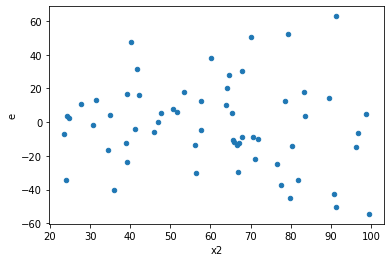

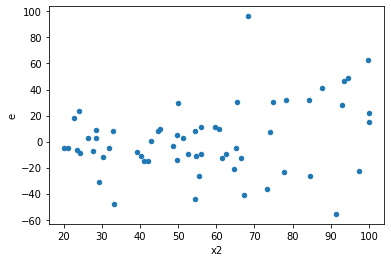

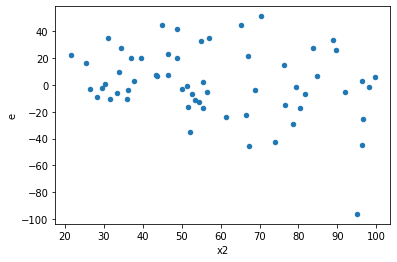

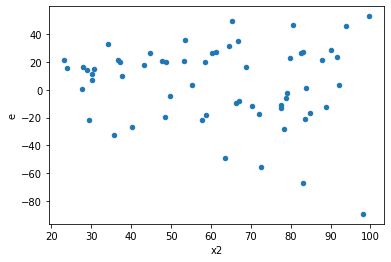

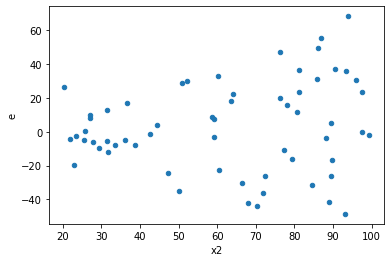

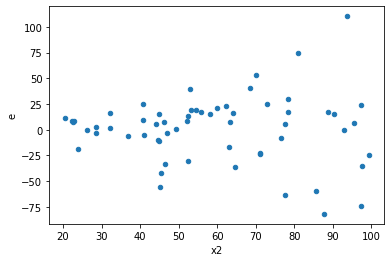

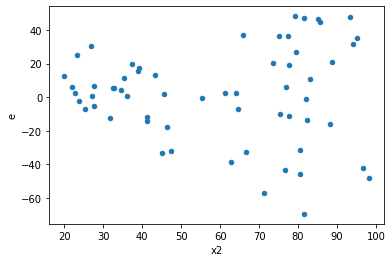

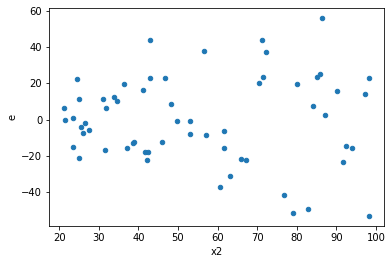

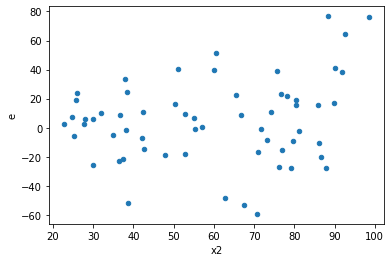

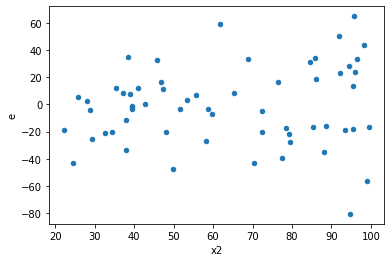

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
2.0,34.0,22.0,11894.963956549835,23993.46781120033,349.85188107499516,1090.6121732363788,3.117354035328432,0.006711493782702416,0.9966442531086488,0.003355746891351208,Reject001=0 : Heteroscedasticity
4.0,21.0,35.0,4991.9898128203595,32991.325780236155,237.7138006104933,942.6093080067473,3.9653116713709973,0.00032158629770617786,0.9998392068511469,0.00016079314885308893,Reject001=0 : Heteroscedasticity
5.0,25.0,31.0,17695.99440840427,42860.157261615575,707.8397763361708,1382.5857181166314,1.9532467153414206,0.07776970511507009,0.961115147442465,0.03888485255753504,Reject001=1 : Homoscedasticity
6.0,25.0,31.0,4995.228845869684,38452.52257323802,199.80915383478737,1240.40395397542,6.20794358100856,3.7342038154974944e-06,0.9999981328980923,1.8671019077487472e-06,Reject001=0 : Heteroscedasticity
9.0,29.0,27.0,10439.94792881816,36862.067275587615,359.9982044420055,1365.2617509476895,3.792412667901594,0.0008140712087960633,0.999592964395602,0.00040703560439803166,Reject001=0 : Heteroscedasticity
10.0,28.0,28.0,10099.249140151967,32238.07496335965,360.68746929114167,1151.3598201199875,3.1921259210439237,0.0030286270447337227,0.9984856864776331,0.0015143135223668613,Reject001=0 : Heteroscedasticity
12.0,36.0,20.0,23756.36034820364,13924.561152424209,659.8988985612123,696.2280576212104,1.055052613573393,0.9231153855452652,0.5384423072273674,0.4615576927726326,Reject001=1 : Homoscedasticity
13.0,24.0,32.0,7211.730187582573,37933.97655352899,300.4887578159406,1185.436767297781,3.945028678989384,0.00036916471671744056,0.9998154176416413,0.00018458235835872028,Reject001=0 : Heteroscedasticity
16.0,32.0,24.0,10864.103975294016,22316.96287926645,339.503249227938,929.8734533027688,2.7389235755987245,0.012814464306152074,0.993592767846924,0.006407232153076037,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,28.0,28.0,17821.500126532894,17053.831021403043,636.4821473761748,609.0653936215373,0.9569245518233938,0.90808491597365,Reject001=1 : Homoscedasticity
1.0,31.0,25.0,27587.463883321718,11491.017301652117,889.9181897845715,459.6406920660847,0.5164976930939607,0.08170239261412596,Reject001=1 : Homoscedasticity
2.0,34.0,22.0,11894.963956549835,23993.46781120033,349.85188107499516,1090.6121732363788,3.117354035328432,0.006711493782702416,Reject001=0 : Heteroscedasticity
3.0,32.0,24.0,37566.04027285478,8565.164744035852,1173.9387585267118,356.8818643348272,0.3040038176971961,0.001890828494797263,Reject001=0 : Heteroscedasticity
4.0,21.0,35.0,4991.9898128203595,32991.325780236155,237.7138006104933,942.6093080067473,3.9653116713709973,0.00032158629770617786,Reject001=0 : Heteroscedasticity
5.0,25.0,31.0,17695.99440840427,42860.157261615575,707.8397763361708,1382.5857181166314,1.9532467153414206,0.07776970511507009,Reject001=1 : Homoscedasticity
6.0,25.0,31.0,4995.228845869684,38452.52257323802,199.80915383478737,1240.40395397542,6.20794358100856,3.7342038154974944e-06,Reject001=0 : Heteroscedasticity
7.0,24.0,32.0,22121.76631203937,9516.2500223011,921.7402630016404,297.38281319690935,0.3226319009093564,0.00549749208381688,Reject001=0 : Heteroscedasticity
8.0,27.0,29.0,18814.19801526333,19017.906079499273,696.8221487134566,655.7898648103197,0.9411151267523645,0.8772580457910181,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      670
Reject001=0 : Heteroscedasticity    330
Name: Result_test, dtype: int64